In [7]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from keras.models import Model
from keras.utils import img_to_array
from os import listdir
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set random seed
np.random.seed(42)

# Root folder
root_dir = "D:\\FINAL YEAR PROJECT\\senior project code\\FinalProject\\datasets\\NEW2"

In [8]:
def convert_img_to_tensor(fpath):
    img = cv2.imread(fpath)
    img = cv2.resize(img, (256, 256))
    res = img_to_array(img)
    return res

def get_img_data(root_dir):
    dire = listdir(root_dir)
    image_dataset = []

    for subdir in dire:
        skin_img_list = listdir(f"{root_dir}/{subdir}")
        for imgfile in skin_img_list:
            filepath = f"{root_dir}/{subdir}/{imgfile}"
            res = convert_img_to_tensor(filepath)
            image_dataset.append(res)
    
    return image_dataset

In [9]:
image_dataset = get_img_data(root_dir)
print(len(image_dataset))
print(image_dataset[0].shape)

1320
(256, 256, 3)


In [10]:
# Normalize the dataset
image_dataset = np.array(image_dataset, dtype=np.float32) / 255.0
image_dataset = image_dataset.reshape(-1, 256, 256, 3)

In [11]:
# Split the data into train and test sets
xtrain, xtest = train_test_split(image_dataset, test_size=0.2, random_state=100)

In [12]:
# Autoencoder model
input_img = Input(shape=(256, 256, 3))


In [13]:
# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [14]:
# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [18]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [19]:
# Summary of the model
autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 256, 256, 3)         │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,507 (115.26 KB)

 Trainable params: 29,507 (115.26 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Train the model
autoencoder.fit(xtrain, xtrain,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(xtest, xtest))

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - accuracy: 0.6583 - loss: 0.0207 - val_accuracy: 0.2341 - val_loss: 0.0068
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.4014 - loss: 0.0063 - val_accuracy: 0.2410 - val_loss: 0.0047
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.5510 - loss: 0.0044 - val_accuracy: 0.7645 - val_loss: 0.0033
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - accuracy: 0.7454 - loss: 0.0031 - val_accuracy: 0.8268 - val_loss: 0.0025
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.7834 - loss: 0.0024 - val_accuracy: 0.8307 - val_loss: 0.0021
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 760ms/step - accuracy: 0.7832 - loss: 0.0020 - val_accuracy: 0.8275 - val_loss: 0.0016
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 773ms/step - accuracy: 0.8107 - loss: 0.0016 - val_accuracy: 0.8421 - val_loss: 0.0015
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 782ms/step - accuracy: 0.8180 - loss: 0.0015 - val_accuracy: 0.865

In [21]:
# Save the model
autoencoder.save('autoencoder_model.h5')

In [22]:
# Predictions
decoded_imgs = autoencoder.predict(xtest)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step


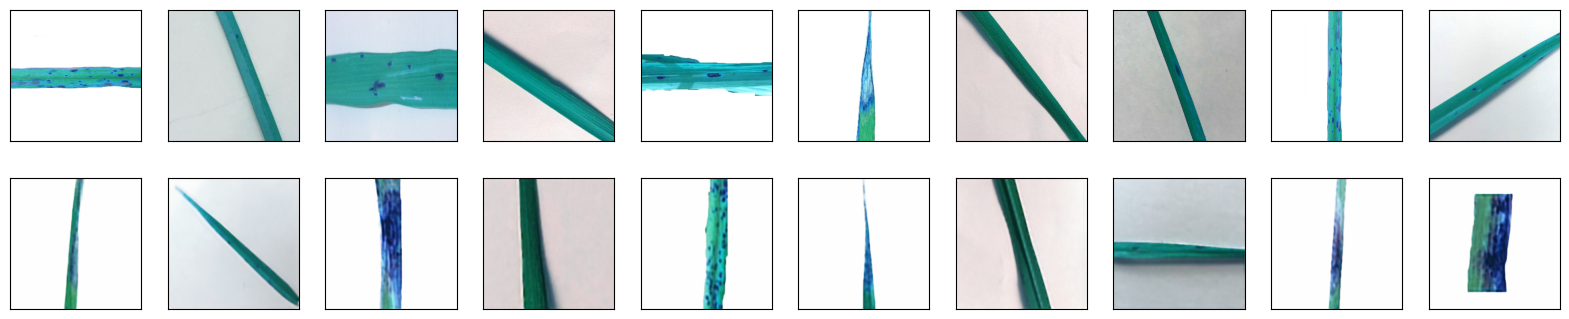

In [25]:
# Visualize original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtrain[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
     # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()